<a href="https://colab.research.google.com/github/MASKED-GOD/2FA/blob/main/N%C4%81bhas_Samhita_Stellar_Distance_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Brief overview of each library used:
# numpy: Efficient handling of arrays and mathematical functions
# pandas: Powerful data structures for data analysis, particularly DataFrame
# matplotlib.pyplot: Plotting and visualization
# seaborn: Statistical data visualization built on top of matplotlib
# sklearn.model_selection: Tools for splitting data into train and test sets
# sklearn.preprocessing: Data preprocessing utilities like scaling
# sklearn.linear_model: Linear regression models including regularized versions (Ridge, Lasso)
# sklearn.ensemble: Ensemble methods for regression such as Random Forest and Gradient Boosting
# sklearn.metrics: Performance metrics for evaluating models
# astropy.units: Handling of physical units
# astropy.coordinates: Astronomical coordinate transformations
# IPython.display: Tools for displaying rich media (like HTML) in Jupyter Notebooks

In [ ]:
# Importing necessary libraries for data manipulation, visualization, and machine learning

# Numerical operations and array manipulation
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Astronomy-specific utilities for coordinate transformations and calculations
from astropy import units as u
from astropy.coordinates import SkyCoord

# For displaying HTML content in Jupyter Notebooks
from IPython.display import display, HTML

In [ ]:
# Load the CSV file named '88-constellations.csv' into a DataFrame.
# The file is assumed to be separated by semicolons (';').
# The 'on_bad_lines' parameter is set to 'skip' to ignore and skip any malformed lines in the file.
df = pd.read_csv('88-constellations.csv', sep=';', on_bad_lines='skip')

# Display the first three rows of the DataFrame to get an initial glimpse of the data.
df.head(3)

,Observation Season / Saison d'observation,IAU code,Latin name / Nom latin,French name / Nom français,English name / Nom en anglais,Constellation area in square degrees / Étendue de la constellation en degrés carrés,Dec (Declinaison),RA (Right Ascension / Ascension droite),Principal star / Étoile principale,Constellation area in % of the celestial sphere / Étendue de la constellation en % de la sphère céleste,Constellation zone (celestial equator) / Zone de la constellation (équateur céleste),Constellation zone (ecliptic) / Zone de la constellation (écliptique),Constellation zone (Milky Way) / Zone de la constellation (Voie Lactée),Quad,Name origin / Origine de l'apellation,Image
0,Summer / Été,Sct,Scutum,L’Écu de Sobieski,Shield,109.114,"-09° 53,32'","15:54,18",α Scuti,"0,26 %",South constellation,South ecliptic constellation,Milky Way Equator,South Hemisphere Quadrant 4,Hevelius,https://www.datastro.eu/api/explore/v2.1/catal...
1,Southern hemisphere constellation / Constellat...,Vol,Volans,Poisson volant,Flying Fish,141.354,"-69° 48,07'","13:24,39",β Volantis,"0,34 %",South constellation,South ecliptic constellation,NaN,South Hemisphere Quadrant 2,Bayer,https://www.datastro.eu/api/explore/v2.1/catal...
2,Southern hemisphere constellation / Constellat...,Tuc,Tucana,Toucan,Toucan,294.557,"+31° 28,56'","23:46,64",α Tucanae,"0,71 %",South constellation,South ecliptic constellation,NaN,North Hemisphere Quadrant 1,Bayer,https://www.datastro.eu/api/explore/v2.1/catal...


In [ ]:

# Cleaning and converting specific columns to numeric types

# Replace any non-numeric characters in the 'Dec (Declinaison)' column with an empty string and convert the column to float type
df['Dec (Declinaison)'] = df['Dec (Declinaison)'].replace(r'[^\d\.\-]', '', regex=True).astype(float)

# Replace any non-numeric characters in the 'RA (Right Ascension / Ascension droite)' column with an empty string and convert the column to float type
df['RA (Right Ascension / Ascension droite)'] = df['RA (Right Ascension / Ascension droite)'].replace(r'[^\d\.\-]', '', regex=True).astype(float)

In [ ]:
# Printing the first few entries of the cleaned and converted columns

# Print the first five values in the 'Dec (Declinaison)' column to verify the cleaning and conversion process
print(df['Dec (Declinaison)'].head())

# Print the first five values in the 'RA (Right Ascension / Ascension droite)' column to verify the cleaning and conversion process
print(df['RA (Right Ascension / Ascension droite)'].head())

0    -95332.0
1   -694807.0
2    312856.0
3    504327.0
4    322328.0
Name: Dec (Declinaison), dtype: float64
0    155418.0
1    132439.0
2    234664.0
3     21107.0
4     44213.0
Name: RA (Right Ascension / Ascension droite), dtype: float64


In [ ]:
# Checking for missing values and handling them

# Print the number of missing values in the 'Dec (Declinaison)' column
print(df['Dec (Declinaison)'].isna().sum())

# Print the number of missing values in the 'RA (Right Ascension / Ascension droite)' column
print(df['RA (Right Ascension / Ascension droite)'].isna().sum())

# Drop rows where either 'Dec (Declinaison)' or 'RA (Right Ascension / Ascension droite)' is missing
df = df.dropna(subset=['Dec (Declinaison)', 'RA (Right Ascension / Ascension droite)'])

# Print the first five values in the 'Dec (Declinaison)' column after dropping rows with missing values
print(df['Dec (Declinaison)'].head())

# Print the first five values in the 'RA (Right Ascension / Ascension droite)' column after dropping rows with missing values
print(df['RA (Right Ascension / Ascension droite)'].head())

0
0
0    -95332.0
1   -694807.0
2    312856.0
3    504327.0
4    322328.0
Name: Dec (Declinaison), dtype: float64
0    155418.0
1    132439.0
2    234664.0
3     21107.0
4     44213.0
Name: RA (Right Ascension / Ascension droite), dtype: float64


In [ ]:
# Ensuring the columns are correctly converted to float type and verifying the conversion

# Convert the 'Dec (Declinaison)' column to float type
df['Dec (Declinaison)'] = df['Dec (Declinaison)'].astype(float)

# Convert the 'RA (Right Ascension / Ascension droite)' column to float type
df['RA (Right Ascension / Ascension droite)'] = df['RA (Right Ascension / Ascension droite)'].astype(float)

# Print the first five values in the 'Dec (Declinaison)' column to verify the conversion
print(df['Dec (Declinaison)'].head())

# Print the first five values in the 'RA (Right Ascension / Ascension droite)' column to verify the conversion
print(df['RA (Right Ascension / Ascension droite)'].head())

0    -95332.0
1   -694807.0
2    312856.0
3    504327.0
4    322328.0
Name: Dec (Declinaison), dtype: float64
0    155418.0
1    132439.0
2    234664.0
3     21107.0
4     44213.0
Name: RA (Right Ascension / Ascension droite), dtype: float64


In [ ]:
# Encoding categorical variables using one-hot encoding and displaying the first few rows of the resulting DataFrame

# Apply one-hot encoding to the specified categorical columns
df_encoded = pd.get_dummies(df, columns=[
    "Constellation zone (celestial equator) / Zone de la constellation (équateur céleste)",
    "Constellation zone (ecliptic) / Zone de la constellation (écliptique)"
])

# Display the first five rows of the encoded DataFrame to verify the encoding process
df_encoded.head()

,Observation Season / Saison d'observation,IAU code,Latin name / Nom latin,French name / Nom français,English name / Nom en anglais,Constellation area in square degrees / Étendue de la constellation en degrés carrés,Dec (Declinaison),RA (Right Ascension / Ascension droite),Principal star / Étoile principale,Constellation area in % of the celestial sphere / Étendue de la constellation en % de la sphère céleste,...,Constellation zone (ecliptic) / Zone de la constellation (écliptique)_Zodiacal constellation # 12,Constellation zone (ecliptic) / Zone de la constellation (écliptique)_Zodiacal constellation # 13,Constellation zone (ecliptic) / Zone de la constellation (écliptique)_Zodiacal constellation # 2,Constellation zone (ecliptic) / Zone de la constellation (écliptique)_Zodiacal constellation # 3,Constellation zone (ecliptic) / Zone de la constellation (écliptique)_Zodiacal constellation # 4,Constellation zone (ecliptic) / Zone de la constellation (écliptique)_Zodiacal constellation # 5,Constellation zone (ecliptic) / Zone de la constellation (écliptique)_Zodiacal constellation # 6,Constellation zone (ecliptic) / Zone de la constellation (écliptique)_Zodiacal constellation # 7,Constellation zone (ecliptic) / Zone de la constellation (écliptique)_Zodiacal constellation # 8,Constellation zone (ecliptic) / Zone de la constellation (écliptique)_Zodiacal constellation # 9
0,Summer / Été,Sct,Scutum,L’Écu de Sobieski,Shield,109.114,-95332.0,155418.0,α Scuti,"0,26 %",...,False,False,False,False,False,False,False,False,False,False
1,Southern hemisphere constellation / Constellat...,Vol,Volans,Poisson volant,Flying Fish,141.354,-694807.0,132439.0,β Volantis,"0,34 %",...,False,False,False,False,False,False,False,False,False,False
2,Southern hemisphere constellation / Constellat...,Tuc,Tucana,Toucan,Toucan,294.557,312856.0,234664.0,α Tucanae,"0,71 %",...,False,False,False,False,False,False,False,False,False,False
3,Spring / Printemps,UMa,Ursa Major,Grande Ourse,Big Bear,1279.660,504327.0,21107.0,Alioth,"3,10 %",...,False,False,False,False,False,False,False,False,False,False
4,Autumn / Automne,Tri,Triangulum,Triangle,Triangle,131.847,322328.0,44213.0,β Trianguli,"0,32 %",...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Printing the columns of the encoded DataFrame to verify the one-hot encoding
# Print the columns of the encoded DataFrame
print(df_encoded.columns)

Index(['Observation Season / Saison d'observation', 'IAU code',
       'Latin name / Nom latin ', 'French name / Nom français ',
       'English name / Nom en anglais',
       'Constellation area in square degrees / Étendue de la constellation en degrés carrés',
       'Dec (Declinaison)', 'RA (Right Ascension / Ascension droite)',
       'Principal star / Étoile principale',
       'Constellation area in % of the celestial sphere / Étendue de la constellation en % de la sphère céleste',
       'Constellation zone (Milky Way) / Zone de la constellation (Voie Lactée)',
       'Quad', 'Name origin / Origine de l'apellation', 'Image',
       'Constellation zone (celestial equator) / Zone de la constellation (équateur céleste)_Equatorial constellation',
       'Constellation zone (celestial equator) / Zone de la constellation (équateur céleste)_North constellation',
       'Constellation zone (celestial equator) / Zone de la constellation (équateur céleste)_North constellation - North Cele

In [ ]:
# Preparing feature matrix X and target matrix y for modeling

# Create the feature matrix X by dropping the specified columns
# The 'errors='ignore'' parameter ensures that if any of the columns to drop do not exist, no error is raised
X = df_encoded.drop([
    'Latin name / Nom latin',
    'French name / Nom français',
    'English name / Nom en anglais',
    'Principal star / Étoile principale'
], axis=1, errors='ignore')

# Create the target matrix y by selecting the specified columns
y = df_encoded[['Dec (Declinaison)', 'RA (Right Ascension / Ascension droite)', 'Constellation area in square degrees / Étendue de la constellation en degrés carrés']]

In [ ]:
# Print the data types of each column in the feature matrix X
print(X.dtypes)
# Identify non-numeric columns in the feature matrix X
# select_dtypes(include=['object']) selects columns with data type 'object' (typically strings or categorical data)
non_numeric_cols = X.select_dtypes(include=['object']).columns
# Print the list of non-numeric columns
print(non_numeric_cols)

Observation Season / Saison d'observation                                                                                           object
IAU code                                                                                                                            object
Latin name / Nom latin                                                                                                              object
French name / Nom français                                                                                                          object
Constellation area in square degrees / Étendue de la constellation en degrés carrés                                                float64
Dec (Declinaison)                                                                                                                  float64
RA (Right Ascension / Ascension droite)                                                                                            float64
Constellation area in % of 

In [ ]:
# One-hot encoding categorical features, splitting data, and scaling features
# One-hot encode the non-numeric columns in the feature matrix X
# 'drop_first=True' ensures that the first category is dropped to avoid multicollinearity
X_encoded = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Split the encoded feature matrix X and target matrix y into training and test sets
# 20% of the data is used for testing, and 80% is used for training
# 'random_state=42' ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize a StandardScaler for feature scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert all columns in the feature matrix X to numeric types, coercing any errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')
# Drop rows with any NaN values in the feature matrix X
X = X.dropna()

In [ ]:
# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regressor': RandomForestRegressor(),
}

# Dictionary to store the performance metrics for each model
results = {}

# Iterate over each model in the models dictionary
for name, model in models.items():
    # Train the model using the scaled training data
    model.fit(X_train_scaled, y_train)

    # Predict the target values for the scaled test data
    y_pred = model.predict(X_test_scaled)

    # Calculate Mean Squared Error (MSE) and R-squared (R2) score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the metrics in the results dictionary
    results[name] = {'MSE': mse, 'R2': r2}

    # Print the performance metrics for the current model
    print(f"{name}: MSE = {mse:.2f}, R2 = {r2:.2f}")

# Convert the results dictionary into a DataFrame
results_df = pd.DataFrame(results).T

# Sort the DataFrame by the R2 score in descending order
results_df.sort_values(by='R2', ascending=False, inplace=True)

# Display the sorted DataFrame
results_df

Linear Regression: MSE = 18017126939.29, R2 = 0.46
Ridge Regression: MSE = 17826542091.24, R2 = 0.46
Lasso Regression: MSE = 5715162453.44, R2 = 0.96
Random Forest Regressor: MSE = 1229604430.11, R2 = 0.43


,MSE,R2
Lasso Regression,5.715162e+09,0.964979
Ridge Regression,1.782654e+10,0.459775
Linear Regression,1.801713e+10,0.456434
Random Forest Regressor,1.229604e+09,0.432773


<ipython-input-15-4765da143010>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='MSE', data=results_df, palette='viridis')


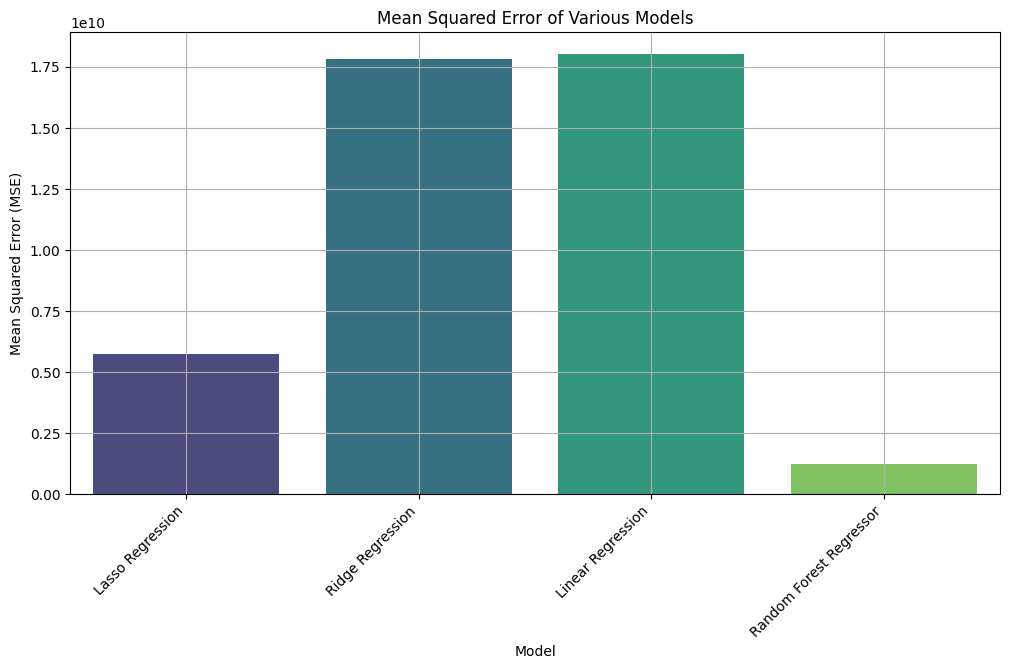

<ipython-input-15-4765da143010>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='R2', data=results_df, palette='viridis')


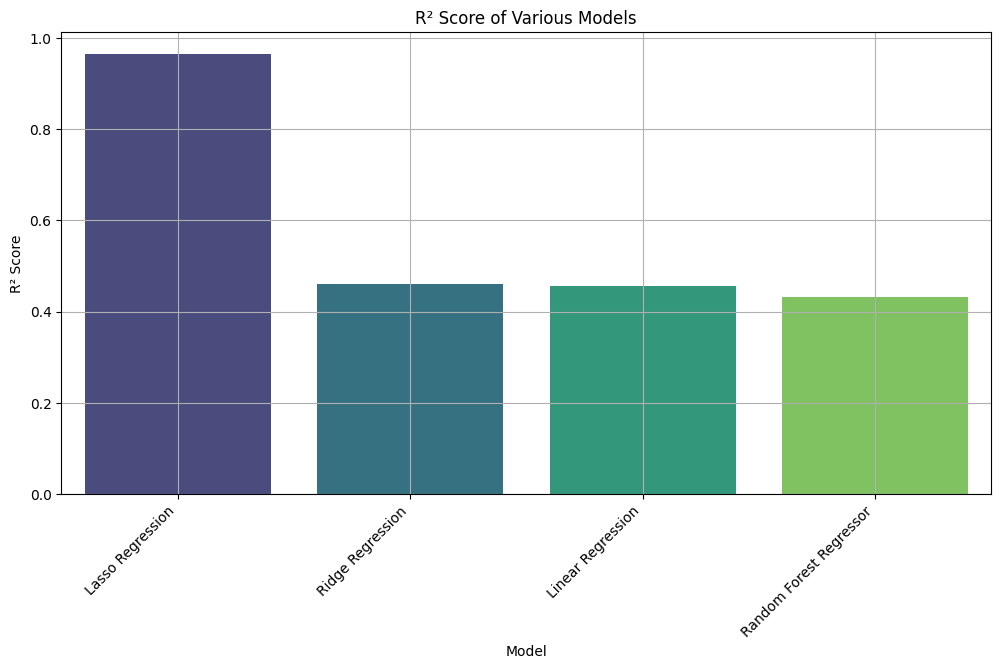

In [ ]:
# Import seaborn for advanced visualization
import seaborn as sns

# Plot Mean Squared Error (MSE) for various models
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='MSE', data=results_df, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Model')  # Label for the x-axis
plt.ylabel('Mean Squared Error (MSE)')  # Label for the y-axis
plt.title('Mean Squared Error of Various Models')  # Title of the plot
plt.grid(True)  # Add grid lines for better readability
plt.show()  # Display the plot

# Plot R² Score for various models
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='R2', data=results_df, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Model')  # Label for the x-axis
plt.ylabel('R² Score')  # Label for the y-axis
plt.title('R² Score of Various Models')  # Title of the plot
plt.grid(True)  # Add grid lines for better readability
plt.show()  # Display the plot

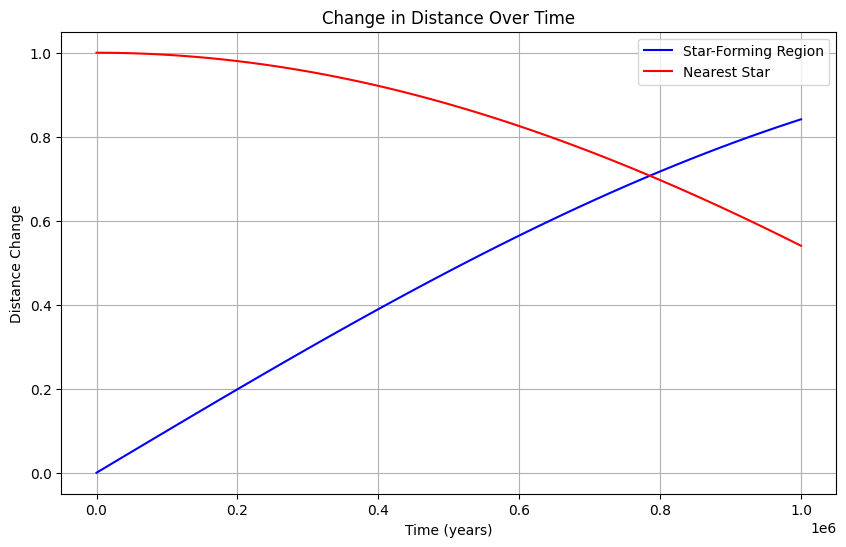

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define time intervals from 0 to 1 million years, with 100 points
time_intervals = np.linspace(0, 1e6, 100)

# Compute distances for a star-forming region using a sine function
distances_star_forming_region = np.sin(time_intervals / 1e6)

# Compute distances for the nearest star using a cosine function
distances_nearest_star = np.cos(time_intervals / 1e6)

# Create a new figure with a specified size
plt.figure(figsize=(10, 6))

# Plot the distances for the star-forming region
plt.plot(time_intervals, distances_star_forming_region, label='Star-Forming Region', color='blue')

# Plot the distances for the nearest star
plt.plot(time_intervals, distances_nearest_star, label='Nearest Star', color='red')

# Label the x-axis
plt.xlabel('Time (years)')
# Label the y-axis
plt.ylabel('Distance Change')
# Set the title of the plot
plt.title('Change in Distance Over Time')
# Add a legend to the plot
plt.legend()
# Add a grid to the plot for better readability
plt.grid(True)
# Display the plot
plt.show()